In [ ]:
Pkg.clone("https://github.com/arturgower/EffectiveWaves.jl.git")


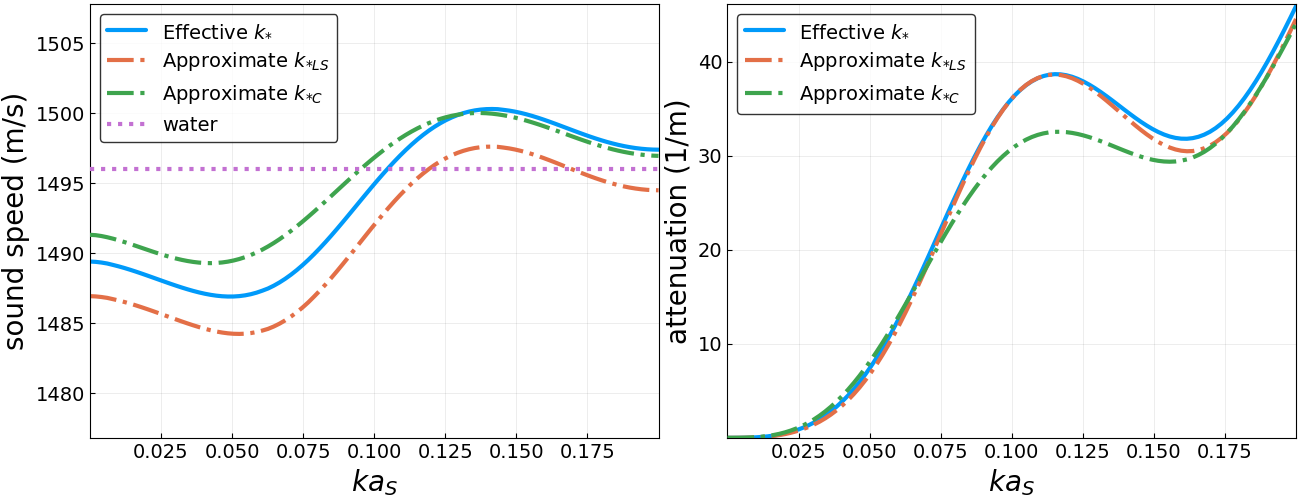

In [2]:
using EffectiveWaves

using LaTeXStrings
using Plots
height=500
# unicodeplots()
 pyplot(linewidth=3, size=(2.6*height,height), border=false)

 Plots.scalefontsizes(1.8)

filename="fluid"
mediumname = "water"
## choose material

  # fluid
  medium = WaterDistilled
  # inclusion1 = SodiumNitrate # surfactant ?
  inclusion1 = Glycerol # surfactant ?
  inclusion2 = Hexadecane

  # medium = Hexadecane
  # # inclusion1 = SodiumNitrate # surfactant ?
  # inclusion1 = SodiumNitrate # surfactant ?
  # inclusion2 = Glycerol

  ωfactor = 4000;
  ωs = 2*ωfactor.*linspace(real(medium.c/10000),real(medium.c),100) # k from 0 to 1
  # ωs = 2.0*pi*linspace(1.0e1,1.0e7,100)

  volfrac = 0.22
  r1 = 0.1/ωfactor; vol1 = 0.11;
  # r1 = 0.1/ωfactor; vol1 = 0.06;
  r2 = 1.0/ωfactor; vol2 = volfrac - vol1

  sp1 = Specie(ρ=inclusion1.ρ, r=r1, c=inclusion1.c, volfrac = vol1)
  sp2 = Specie(ρ=inclusion2.ρ, r=r2, c=inclusion2.c, volfrac = volfrac-vol1)

  # True wavenumber
  kTs  = wavenumber_low_volfrac(ωs, medium, [sp1,sp2]);
  # Approximate wavenumber
  kTLSs = two_species_approx_wavenumber(ωs, medium, [sp1,sp2]);
  # Approximate Challis wavenumber
  kTCs = multispecies_challis(ωs, medium, [sp1,sp2]);

  speed_arr = [ ωs./real(kTs), ωs./real(kTLSs), ωs./real(kTCs), 0.*ωs + real(medium.c)]
  atten_arr = imag([kTs,kTLSs,kTCs])

  styles = [:solid :dashdot :dashdot :dot]
  labs = [L"Effective $k_{*}$" L"Approximate $k_{*LS}$" L"Approximate $k_{*C}$" mediumname];
  ys_arr = speed_arr;
  xs = r1.*ωs./real(medium.c); xlabel = L"k a_S";
  m =5;
  p1= plot(xs, ys_arr, xlabel=xlabel, ylabel="sound speed (m/s)", labels=labs, line = styles
            , ylims = (minimum(minimum.(ys_arr))*0.995, maximum(maximum.(ys_arr))*1.005));

  ys_arr = atten_arr;
  labs = [L"Effective $k_{*}$" L"Approximate $k_{*LS}$" L"Approximate $k_{*C}$"];
  p2 = plot(xs, ys_arr, labels=labs, xlabel=xlabel, ylabel="attenuation (1/m)", line = styles
              , ylims = (minimum(minimum.(ys_arr))*0.995, maximum(maximum.(ys_arr))*1.005));
  plot(p1,p2)


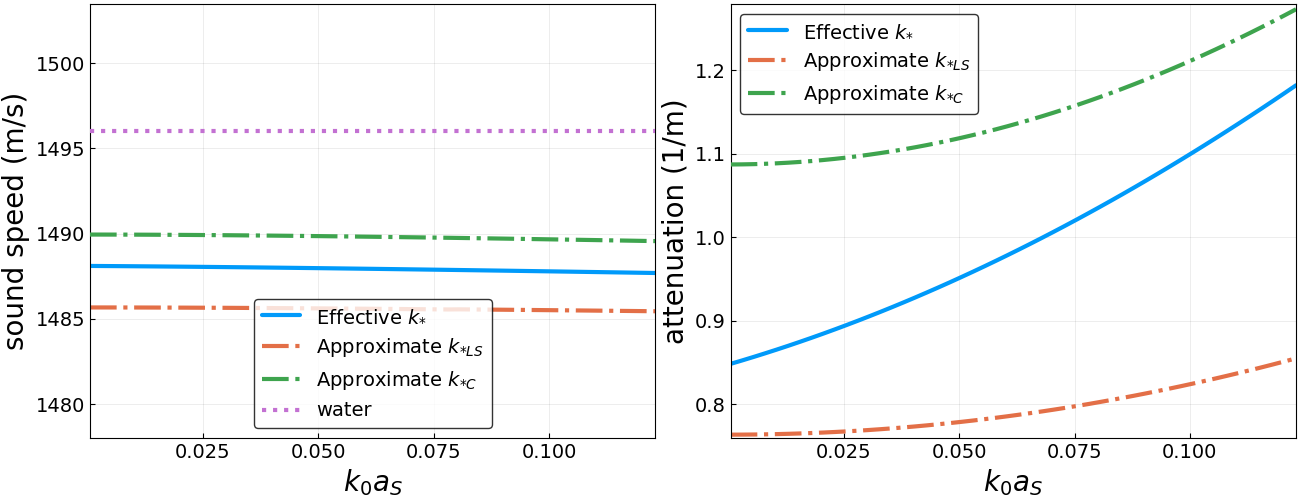

In [3]:
ω = ωfactor.*real(medium.c)/4.
  r1s = (0.002:0.01:0.5)./ωfactor;

  sp2 = Specie(ρ=inclusion2.ρ ,r=r2, c=inclusion2.c, volfrac = volfrac-vol1)

  # True wavenumber
  kTs = map(r1s) do r1
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = vol1)
    wavenumber_low_volfrac(ω, medium, [sp1,sp2])
  end
  # Approximate wavenumber
  kTLSs = map(r1s) do r1
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = vol1)
    two_species_approx_wavenumber(ω, medium, [sp1,sp2])
  end
  # Approximate Challis wavenumber
  kTCs = map(r1s) do r1
    sp1 = Specie(ρ=inclusion1.ρ ,r=r1, c=inclusion1.c, volfrac = vol1)
    multispecies_challis(ω, medium, [sp1,sp2])
  end

  speed_arr = [ ω./real(kTs), ω./real(kTLSs), ω./real(kTCs), 0.*real(kTLSs) + real(medium.c)]
  atten_arr = imag([kTs,kTLSs,kTCs])

  styles = [:solid :dashdot :dashdot :dot]
  labs = [L"Effective $k_{*}$" L"Approximate $k_{*LS}$" L"Approximate $k_{*C}$" mediumname]
  ys_arr = speed_arr;
  xs = r1s.*ω./real(medium.c);
  xlabel=L"k_0 a_S"
  m =5;
  p1 = plot(xs, ys_arr, xlabel=xlabel, ylabel="sound speed (m/s)", labels=labs , line = styles
              , ylims = (minimum(minimum.(ys_arr))*0.995, maximum(maximum.(ys_arr))*1.005));
  # y1 = min(ys_arr[1][1:m]..., ys_arr[2][1:m]...);
  # y2 = max(ys_arr[1][1:m]..., ys_arr[2][1:m]...);
  # p1 = gray_square!([xs[1],xs[m]],[y1,y2]);

  ys_arr = atten_arr;
  labs = [L"Effective $k_{*}$" L"Approximate $k_{*LS}$" L"Approximate $k_{*C}$"]
  p2 = plot(xs, ys_arr, labels=labs, xlabel=xlabel, ylabel="attenuation (1/m)", line=styles
              , ylims = (minimum(minimum.(ys_arr))*0.995, maximum(maximum.(ys_arr))*1.005));
  plot(p1,p2)

In [4]:
Plots.scalefontsizes(1/1.8)